In [92]:
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import dask
from dask.distributed import Client
import dask.dataframe as dd
import dask.array as da
from tqdm import tqdm
from tqdm.notebook import trange, tqdm
import os
import glob
import pickle
from collections import defaultdict
import re

import seaborn as sns
sns.set()

In [2]:
cap_dir = "E:\\TDI_Capstone_Data_Repo\\main-repo\\streamlit"

In [9]:
os.chdir(cap_dir)
print(os.getcwd())
print(os.listdir())

E:\TDI_Capstone_Data_Repo\main-repo\streamlit
['READme', 'sorted_dispo_sale_counts.pkl', 'streamlit_multiApp.py', 'tdi_capstone_apps.py', 'temp.py', 'dispo_sales_data_repo', 'Licensees_0.csv']


In [10]:
df_lic = pd.read_csv('Licensees_0.csv')

In [101]:
df_lic

,global_id,created_at,updated_at,external_id,deleted_at,name,certificate_number,address1,address2,city,state_code,postal_code,country_code,phone,type,code,is_live,expired_at,suspended
0,WAWA1.MM1,1/1/1900 00:00,1/1/1900 00:00,1,NaN,WA State,1.000000e+00,NaN,NaN,NaN,NaN,NaN,US,NaN,state,WA1,True,NaN,False
1,WAWA1.MM2,1/1/1900 00:00,2/21/2018 07:47,1111,2/21/2018 07:47,LCB Grow,9.876544e+09,555 Brown St,NaN,Olympia,WA,98101,US,206-555-1212,cultivator,G892365,True,NaN,False
2,WAWA1.MM3,1/1/1900 00:00,2/21/2018 07:47,2222,2/21/2018 07:47,LCB Mfg,9.876544e+09,555 Brown St,NaN,Olympia,WA,98101,US,206-555-1212,production,M457698,True,NaN,False
3,WAWA1.MM4,1/1/1900 00:00,2/21/2018 07:47,3333,2/21/2018 07:47,LCB Retail,4.930938e+09,555 Brown St,NaN,Olympia,WA,98101,US,206-555-1212,dispensary,R773948,True,NaN,False
4,WAWA1.MM5,1/1/1900 00:00,2/21/2018 07:47,4444,2/21/2018 07:47,LCB Lab,4.930938e+09,555 Brown St,NaN,Tacoma,WA,98110,US,206-555-1213,lab,L883093,True,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,WAWA1.MM2C3,12/3/2020 18:08,1/5/2021 18:07,wa add,NaN,FAR WEST ENTERPRISE,6.033547e+08,4350 KAWECKI RD STE A,NaN,MALAGA,WA,988280000,USA,2066731984,cultivator,G416111,False,12/30/2018 16:00,True
2882,WAWA1.MM2C4,12/7/2020 18:07,1/5/2021 18:06,wa add,NaN,GOOBIE'S DOOBIES,6.035765e+08,28680 MAPLE VALLEY BLACK,NaN,MAPLE VALLEY,WA,980388193,USA,2534595741,dispensary,R421953,False,1/30/2021 16:00,True
2883,WAWA1.MM2C5,12/18/2020 18:13,1/5/2021 18:07,wa add,NaN,GREEN RIDGE PRODUCTIONS,6.045694e+08,1578 MOORE ST,NaN,SEDRO WOOLLEY,WA,982047523,USA,3603036623,cultivator_production,J417227,False,1/30/2021 16:00,True
2884,WAWA1.MM2C6,12/21/2020 18:12,1/5/2021 18:06,wa add,NaN,KUSHMAN,6.027086e+08,11110 MUKILTEO SPEEDWAY,NaN,MUKILTEO,WA,982755450,USA,4254441575,dispensary,R415287,False,3/30/2021 17:00,True


In [93]:
files = os.listdir()
pattern = r"(?<=sales_)(WAWA1\.[A-Z0-9]+)"
names = [re.findall(pattern, file) for file in files]

In [96]:
names_flat = [item for sublist in names for item in sublist]

In [98]:
print(names_flat)

['WAWA1.MM5W', 'WAWA1.MM4K', 'WAWA1.MM57', 'WAWA1.MMFO', 'WAWA1.MM4S', 'WAWA1.MMEV', 'WAWA1.MM9P', 'WAWA1.MM18J', 'WAWA1.MM11S', 'WAWA1.MM13P', 'WAWA1.MMQY', 'WAWA1.MMIP', 'WAWA1.MMFE', 'WAWA1.MMM9', 'WAWA1.MM1E3', 'WAWA1.MMCF', 'WAWA1.MMIQ', 'WAWA1.MMDN', 'WAWA1.MM1VW', 'WAWA1.MMEJ', 'WAWA1.MMLP', 'WAWA1.MM3E', 'WAWA1.MM12U', 'WAWA1.MM9R', 'WAWA1.MM5Z', 'WAWA1.MMCD', 'WAWA1.MMNZ', 'WAWA1.MM12M', 'WAWA1.MM4C', 'WAWA1.MMKG', 'WAWA1.MM17J', 'WAWA1.MM10X', 'WAWA1.MM4M', 'WAWA1.MMZW', 'WAWA1.MMBH', 'WAWA1.MM13G', 'WAWA1.MM18Q', 'WAWA1.MM13M', 'WAWA1.MM3F', 'WAWA1.MMCT', 'WAWA1.MM4D', 'WAWA1.MMC9', 'WAWA1.MMC8', 'WAWA1.MM12V', 'WAWA1.MM66', 'WAWA1.MM4V', 'WAWA1.MMBE', 'WAWA1.MM1FJ', 'WAWA1.MM1OE', 'WAWA1.MM1BU', 'WAWA1.MM1GV', 'WAWA1.MM1H0', 'WAWA1.MM3H', 'WAWA1.MM3P', 'WAWA1.MM3W', 'WAWA1.MM4F', 'WAWA1.MM4H', 'WAWA1.MM4Z', 'WAWA1.MM5G', 'WAWA1.MM5J', 'WAWA1.MM5K', 'WAWA1.MM6Z', 'WAWA1.MM9I', 'WAWA1.MM10C', 'WAWA1.MM10J', 'WAWA1.MM11R', 'WAWA1.MM11Y', 'WAWA1.MM11Z', 'WAWA1.MM18B', 'WAWA1.MM

In [108]:
test = list(df_lic.query("global_id in @names_flat")['name'])

In [110]:
test = [x.rstrip() for x in test]

In [111]:
test

['CANNARAIL STATION',
 'GREENSIDE',
 'WHIDBEY ISLAND CANNABIS CO.',
 'CRAFT CANNABIS',
 'GREEN STOP CANNABIS',
 'LOVELY BUDS DIVISION',
 'CLEAR CHOICE CANNABIS',
 'CASCADE HERB COMPANY',
 'GOODBUDS',
 'CASCADE KROPZ',
 'THE HAPPY CROP SHOPPE',
 '420 HOLIDAY',
 'ZIPS CANNABIS',
 '420 CARPENTER',
 'HERBAL NATION',
 'SEA CHANGE CANNABIS',
 'GREEN COLLAR CANNABIS',
 'TOP SHELF CANNABIS',
 'POT ZONE',
 'HIGH SOCIETY',
 'CANNABIS CENTRAL',
 'PRC',
 'MARY MART INC',
 'THE GREEN DOOR',
 'MULTIVERSE HOLDINGS',
 "UNCLE IKE'S",
 'THE STASH BOX',
 'MR. BILLS OF BUCKLEY',
 'CINDER',
 'HERBAL E SCENTS',
 'HWY 420',
 'MR. DOOBEES',
 'LOCALAMSTER',
 'THE HIDDEN BUSH',
 'KUSHMART',
 'HAPPY TIME',
 'MUFFYS POT SHOP',
 'THE SLOW BURN',
 "HERB'S HOUSE",
 'BUD COMMANDER',
 'THE TOP SHELF',
 'ISSAQUAH CANNABIS COMPANY',
 'TREEHOUSE CLUB',
 'THE MARIJUANA MERCANTILE',
 'EMERALD LEAVES',
 'HIGHER LEAF MARIJUANA BOUTIQUE',
 'THE HERBERY',
 'THE HERBERY',
 'THE GALLERY SPANAWAY',
 'THE GREEN NUGGET',
 'OZ. KING

In [197]:
os.chdir(myPath)

In [207]:
def sales_stats(path, licensees_path):
    # grab all files in the directory
    files = os.listdir(path)
    # regex pattern for the Washington State id for each dispensary
    pattern = r"(?<=sales_)(WAWA1\.[A-Z0-9]+)"
    # collect the state ids for each of the dispensaries
    names = [re.findall(pattern, file) for file in files]
    # flatten the output
    names_flat = [item for sublist in names for item in sublist]
    ############################################################
    lic_df = pd.read_csv(licensees_path)
    dispo_names = list(df_lic.query("global_id in @names_flat")['name'])
    dispo_names = [x.rstrip() for x in dispo_names]
    ############################################################
    rec_sales, rec_returns, med_sales, med_returns, ws_sales, ws_returns, total_sales = [], [], [], [], [], [], []
    avg_price, stddev_price, num_transaction = [], [], []
    avg_price_med, stddev_price_med, num_transaction_med = [], [], []
    avg_price_rec, stddev_price_rec, num_transaction_rec = [], [], []
    for i in tqdm(range(len(files)), desc="Progress"):
        #print("Loading {}".format(files[i]))
        # load an individual file
        df = pd.read_csv(files[i])
        # convert date to a datetime
        df['sold_at'] = pd.to_datetime(df['sold_at'])
        # correct returns, make all values positive
        df["price_total"] = df["price_total"].apply(lambda x: x if x>=0 else -1*x)
        # query dataframes to break down into different categories I nedd
        rec_sal = df.query("type == 'retail_recreational' & status == 'sale'").set_index('sold_at').resample('D').sum()
        med_sal = df.query("type == 'retail_medical' & status == 'sale'").set_index('sold_at').resample('D').sum()
        who_sal = df.query("type == 'wholesale' & status == 'sale'").set_index('sold_at').resample('D').sum()
        rec_ret = df.query("type == 'retail_recreational' & status == 'return'").set_index('sold_at').resample('D').sum()
        med_ret = df.query("type == 'retail_medical' & status == 'return'").set_index('sold_at').resample('D').sum()
        who_ret = df.query("type == 'wholesale' & status == 'return'").set_index('sold_at').resample('D').sum()
        tot_sales = df.query("status == 'sale'").set_index('sold_at').resample('D').sum()
        
        avg_prices = df.query("status == 'sale'").set_index('sold_at').resample('D').mean()
        stddev_prices = df.query("status == 'sale'").set_index('sold_at').resample('D').std()
        num_transactions = df.query("status == 'sale'").set_index('sold_at').resample('D').count()
        
        avg_prices_m = df.query("type == 'retail_medical' & status == 'sale'").set_index('sold_at').resample('D').mean()
        stddev_prices_m = df.query("type == 'retail_medical' & status == 'sale'").set_index('sold_at').resample('D').std()
        num_transactions_m = df.query("type == 'retail_medical' & status == 'sale'").set_index('sold_at').resample('D').count()
        
        avg_prices_r = df.query("type == 'retail_recreational' & status == 'sale'").set_index('sold_at').resample('D').mean()
        stddev_prices_r = df.query("type == 'retail_recreational' & status == 'sale'").set_index('sold_at').resample('D').std()
        num_transactions_r = df.query("type == 'retail_recreational' & status == 'sale'").set_index('sold_at').resample('D').count()
        # append everything to its specific list
        rec_sales.append(rec_sal)
        med_sales.append(med_sal)
        ws_sales.append(who_sal)
        rec_returns.append(rec_ret)
        rec_returns.append(med_ret)
        rec_returns.append(who_ret)
        total_sales.append(tot_sales)
        
        avg_price.append(avg_prices)
        stddev_price.append(stddev_prices)
        num_transaction.append(num_transactions)
        
        avg_price_med.append(avg_prices_m)
        stddev_price_med.append(stddev_prices_m)
        num_transaction_med.append(num_transactions_m)
        
        avg_price_rec.append(avg_prices_r)
        stddev_price_rec.append(stddev_prices_r)
        num_transaction_rec.append(num_transactions_r)
        
    return([rec_sales, rec_returns, med_sales, med_returns, 
            ws_sales, ws_returns, dispo_names, total_sales,
            avg_price, stddev_price, num_transaction,
            avg_price_med, stddev_price_med, num_transaction_med,
            avg_price_rec, stddev_price_rec, num_transaction_rec,
            names_flat])

In [201]:
myPath = "E:\\TDI_Capstone_Data_Repo\\main-repo\\streamlit\\dispo_sales_data_repo\\"
lic_path = "E:\\TDI_Capstone_Data_Repo\\main-repo\\streamlit\\Licensees_0.csv"

In [208]:
out = sales_stats(myPath, lic_path)

Progress:   0%|          | 0/99 [00:00<?, ?it/s]

In [194]:
shapes = list(map(lambda x: x.shape[0], out[7]))

In [195]:
print(shapes)

[1096, 1066, 1072, 1066, 1066, 1072, 1045, 1088, 1066, 1071, 1066, 1067, 1066, 1074, 1065, 1066, 1066, 1073, 1025, 1090, 1070, 1071, 1070, 1153, 1074, 1072, 1158, 1071, 1071, 885, 1094, 1072, 1071, 1139, 1081, 1088, 696, 1158, 1157, 1074, 944, 1071, 1071, 1070, 1071, 1158, 1077, 1071, 888, 888, 1096, 1280, 1066, 1158, 1066, 1158, 1066, 1066, 1066, 1096, 257, 1096, 1137, 1158, 1159, 1158, 1066, 1096, 1096, 1096, 1066, 1066, 1066, 1066, 1066, 1158, 1066, 1066, 1067, 1066, 1066, 1066, 1096, 1158, 1158, 1072, 1096, 1263, 1096, 1066, 1157, 1066, 1096, 1096, 1096, 1066, 1092, 1096, 1158]


In [209]:
len(out)

18

In [210]:
print(len(out[17]))
print(len(out[6]))

99
99


In [211]:
out[17]

['WAWA1.MM5W',
 'WAWA1.MM4K',
 'WAWA1.MM57',
 'WAWA1.MMFO',
 'WAWA1.MM4S',
 'WAWA1.MMEV',
 'WAWA1.MM9P',
 'WAWA1.MM18J',
 'WAWA1.MM11S',
 'WAWA1.MM13P',
 'WAWA1.MMQY',
 'WAWA1.MMIP',
 'WAWA1.MMFE',
 'WAWA1.MMM9',
 'WAWA1.MM1E3',
 'WAWA1.MMCF',
 'WAWA1.MMIQ',
 'WAWA1.MMDN',
 'WAWA1.MM1VW',
 'WAWA1.MMEJ',
 'WAWA1.MMLP',
 'WAWA1.MM3E',
 'WAWA1.MM12U',
 'WAWA1.MM9R',
 'WAWA1.MM5Z',
 'WAWA1.MMCD',
 'WAWA1.MMNZ',
 'WAWA1.MM12M',
 'WAWA1.MM4C',
 'WAWA1.MMKG',
 'WAWA1.MM17J',
 'WAWA1.MM10X',
 'WAWA1.MM4M',
 'WAWA1.MMZW',
 'WAWA1.MMBH',
 'WAWA1.MM13G',
 'WAWA1.MM18Q',
 'WAWA1.MM13M',
 'WAWA1.MM3F',
 'WAWA1.MMCT',
 'WAWA1.MM4D',
 'WAWA1.MMC9',
 'WAWA1.MMC8',
 'WAWA1.MM12V',
 'WAWA1.MM66',
 'WAWA1.MM4V',
 'WAWA1.MMBE',
 'WAWA1.MM1FJ',
 'WAWA1.MM1OE',
 'WAWA1.MM1BU',
 'WAWA1.MM1GV',
 'WAWA1.MM1H0',
 'WAWA1.MM3H',
 'WAWA1.MM3P',
 'WAWA1.MM3W',
 'WAWA1.MM4F',
 'WAWA1.MM4H',
 'WAWA1.MM4Z',
 'WAWA1.MM5G',
 'WAWA1.MM5J',
 'WAWA1.MM5K',
 'WAWA1.MM6Z',
 'WAWA1.MM9I',
 'WAWA1.MM10C',
 'WAWA1.MM10J',
 'WAW

In [206]:
out[11]

[            price_total
 sold_at                
 2018-01-01          0.0
 2018-01-02          0.0
 2018-01-03          0.0
 2018-01-04          0.0
 2018-01-05          0.0
 ...                 ...
 2020-04-25          NaN
 2020-04-26         86.0
 2020-04-27          NaN
 2020-04-28        176.5
 2020-04-29         58.0
 
 [850 rows x 1 columns],
             price_total
 sold_at                
 2018-01-31    15.303762
 2018-02-01    15.850294
 2018-02-02    16.430219
 2018-02-03    14.764910
 2018-02-04    15.235408
 ...                 ...
 2019-07-10    14.003088
 2019-07-11    14.143186
 2019-07-12    13.660990
 2019-07-13    12.150112
 2019-07-14    14.310909
 
 [530 rows x 1 columns],
             price_total
 sold_at                
 2018-01-25    14.595000
 2018-01-26    23.760000
 2018-01-27     9.500000
 2018-01-28     9.780000
 2018-01-29    16.630000
 ...                 ...
 2019-07-11    14.120077
 2019-07-12    14.547252
 2019-07-13    13.709010
 2019-07-14          

In [220]:
foobar = [out[15][i].rename(columns={'price_total': out[17][i]}) for i in range(len(out[15]))]
my_df = pd.concat(foobar, axis=1)
my_df.to_csv("recreational_salesStddev.csv")

In [122]:
foobar

[            CANNARAIL STATION
 sold_at                      
 2018-05-30            2676.57
 2018-05-31           11424.10
 2018-06-01           10421.84
 2018-06-02            8829.67
 2018-06-03            8598.55
 ...                       ...
 2020-12-27           10106.52
 2020-12-28           10015.01
 2020-12-29           12069.23
 2020-12-30           21744.21
 2020-12-31           19903.22
 
 [947 rows x 1 columns],
             GREENSIDE
 sold_at              
 2019-07-13   39341.48
 2019-07-14   43167.82
 2019-07-15   45761.51
 2019-07-16   35379.25
 2019-07-17   33888.31
 ...               ...
 2020-12-27    4817.41
 2020-12-28    7058.61
 2020-12-29    7925.68
 2020-12-30   10213.84
 2020-12-31    9180.95
 
 [538 rows x 1 columns],
             WHIDBEY ISLAND CANNABIS CO.
 sold_at                                
 2019-07-13                     33991.84
 2019-07-14                     25255.24
 2019-07-15                     11587.21
 2019-07-16                       371.3

In [124]:
rec_df

,CANNARAIL STATION,GREENSIDE,WHIDBEY ISLAND CANNABIS CO.,CRAFT CANNABIS,GREEN STOP CANNABIS,LOVELY BUDS DIVISION,CLEAR CHOICE CANNABIS,CASCADE HERB COMPANY,GOODBUDS,CASCADE KROPZ,...,LOCAL ROOTS,KITSAP CANNABIS,UNCLE IKE'S,BLOOM,THE SLOW BURN,EMERALD COAST,LIVING WELL ENTERPRISES,THE VAULT CANNABIS,GREEN2GO,SLOW BURN
sold_at,,,,,,,,,,,,,,,,,,,,,
2018-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16571.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23420.91
2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15348.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23954.24
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8515.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19729.78


In [125]:
os.getcwd()

'E:\\TDI_Capstone_Data_Repo\\main-repo\\streamlit\\dispo_sales_data_repo'

In [127]:
os.chdir('E:\\TDI_Capstone_Data_Repo\\main-repo\\streamlit\\data')

In [129]:
rec_df.to_csv("recreational_sales.csv")

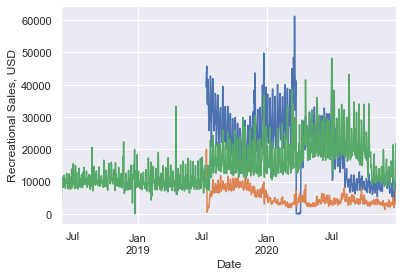

In [182]:
rec_df.query("`GREENSIDE` > 0")['GREENSIDE'].resample('D').sum().plot()
rec_df.query("`CRAFT CANNABIS` > 0")['CRAFT CANNABIS'].resample('D').sum().plot()
rec_df.query("`CANNARAIL STATION` > 0")['CANNARAIL STATION'].resample('D').sum().plot()
plt.xlabel('Date')
plt.ylabel('Recreational Sales, USD')
plt.show()

In [12]:
os.chdir('dispo_sales_data_repo')
print(os.listdir())

['sales_WAWA1.MM5W.csv', 'sales_WAWA1.MM4K.csv', 'sales_WAWA1.MM57.csv', 'sales_WAWA1.MMFO.csv', 'sales_WAWA1.MM4S.csv', 'sales_WAWA1.MMEV.csv', 'sales_WAWA1.MM9P.csv', 'sales_WAWA1.MM18J.csv', 'sales_WAWA1.MM11S.csv', 'sales_WAWA1.MM13P.csv', 'sales_WAWA1.MMQY.csv', 'sales_WAWA1.MMIP.csv', 'sales_WAWA1.MMFE.csv', 'sales_WAWA1.MMM9.csv', 'sales_WAWA1.MM1E3.csv', 'sales_WAWA1.MMCF.csv', 'sales_WAWA1.MMIQ.csv', 'sales_WAWA1.MMDN.csv', 'sales_WAWA1.MM1VW.csv', 'sales_WAWA1.MMEJ.csv', 'sales_WAWA1.MMLP.csv', 'sales_WAWA1.MM3E.csv', 'sales_WAWA1.MM12U.csv', 'sales_WAWA1.MM9R.csv', 'sales_WAWA1.MM5Z.csv', 'sales_WAWA1.MMCD.csv', 'sales_WAWA1.MMNZ.csv', 'sales_WAWA1.MM12M.csv', 'sales_WAWA1.MM4C.csv', 'sales_WAWA1.MMKG.csv', 'sales_WAWA1.MM17J.csv', 'sales_WAWA1.MM10X.csv', 'sales_WAWA1.MM4M.csv', 'sales_WAWA1.MMZW.csv', 'sales_WAWA1.MMBH.csv', 'sales_WAWA1.MM13G.csv', 'sales_WAWA1.MM18Q.csv', 'sales_WAWA1.MM13M.csv', 'sales_WAWA1.MM3F.csv', 'sales_WAWA1.MMCT.csv', 'sales_WAWA1.MM4D.csv', 'sa

In [13]:
df = pd.read_csv(os.listdir()[0])

In [14]:
df

,global_id,type,sold_at,price_total,status
0,WAR415229.SAYFRV,retail_medical,2018-01-01,0.00,sale
1,WAR415229.SAYFSL,retail_medical,2018-01-01,0.00,sale
2,WAR415229.SAYFT5,retail_medical,2018-01-01,0.00,sale
3,WAR415229.SAYH0W,retail_medical,2018-01-01,0.00,sale
4,WAR415229.SAYH1L,retail_medical,2018-01-01,0.00,sale
...,...,...,...,...,...
1803467,WAR415229.SA373PFP,retail_recreational,2020-12-31,43.15,sale
1803468,WAR415229.SA373PHV,retail_recreational,2020-12-31,43.15,sale
1803469,WAR415229.SA373PQS,retail_recreational,2020-12-31,46.03,sale
1803470,WAR415229.SA373Q00,retail_recreational,2020-12-31,14.39,sale


In [32]:
df['sold_at'] = pd.to_datetime(df['sold_at'])

In [49]:
df.dtypes

global_id              object
type                   object
sold_at        datetime64[ns]
price_total           float64
status                 object
dtype: object

In [52]:
df["price_total"] = df["price_total"].apply(lambda x: x if x>=0 else -1*x)

In [53]:
df

,global_id,type,sold_at,price_total,status
0,WAR415229.SAYFRV,retail_medical,2018-01-01,0.00,sale
1,WAR415229.SAYFSL,retail_medical,2018-01-01,0.00,sale
2,WAR415229.SAYFT5,retail_medical,2018-01-01,0.00,sale
3,WAR415229.SAYH0W,retail_medical,2018-01-01,0.00,sale
4,WAR415229.SAYH1L,retail_medical,2018-01-01,0.00,sale
...,...,...,...,...,...
1803467,WAR415229.SA373PFP,retail_recreational,2020-12-31,43.15,sale
1803468,WAR415229.SA373PHV,retail_recreational,2020-12-31,43.15,sale
1803469,WAR415229.SA373PQS,retail_recreational,2020-12-31,46.03,sale
1803470,WAR415229.SA373Q00,retail_recreational,2020-12-31,14.39,sale


In [55]:
df.query("type == 'retail_recreational' & status == 'sale'").set_index('sold_at').resample('D').sum()

,price_total
sold_at,
2018-05-30,2676.57
2018-05-31,11424.10
2018-06-01,10421.84
2018-06-02,8829.67
2018-06-03,8598.55
...,...
2020-12-27,10106.52
2020-12-28,10015.01
2020-12-29,12069.23


In [57]:
df.query("type == 'retail_recreational' & status == 'return'").set_index('sold_at').resample('D').sum().shape

(538, 1)

In [27]:
df.query("price_total > 0 & type == 'retail_medical' & status == 'return'").groupby(["sold_at"])["price_total"].sum()

Series([], Name: price_total, dtype: float64)

In [28]:
df.query("price_total > 0 & type == 'retail_recreational' & status == 'sale'").groupby(["sold_at"])["price_total"].sum()

sold_at
2018-05-30     2676.57
2018-05-31    11424.10
2018-06-01    10421.84
2018-06-02     8812.55
2018-06-03     8598.55
                ...   
2020-12-27    10106.52
2020-12-28    10015.01
2020-12-29    12069.23
2020-12-30    21744.21
2020-12-31    19903.22
Name: price_total, Length: 946, dtype: float64

In [29]:
df.query("price_total > 0 & type == 'retail_recreational' & status == 'return'").groupby(["sold_at"])["price_total"].sum()

sold_at
2019-07-23     72.00
2019-07-28     43.16
2019-07-29     78.00
2019-08-01    231.24
2019-08-05     12.63
               ...  
2020-12-17     23.97
2020-12-23     35.97
2020-12-28     54.80
2020-12-29     29.28
2020-12-31    119.85
Name: price_total, Length: 200, dtype: float64

In [25]:
df.query("price_total > 0 & type == 'wholesale' & status == 'sale'").groupby(["sold_at"])["price_total"].sum()

Series([], Name: price_total, dtype: float64)